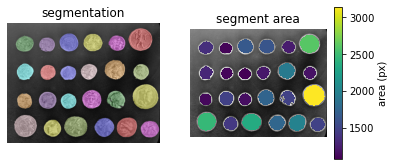

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import (
        color, data, filters, measure,
        morphology, segmentation, util
        )

# grab the image
coins = data.coins()

# segment the image; from:
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html
edges = filters.farid(coins)
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
watershed = segmentation.watershed(edges, markers)
segmented_raw = measure.label(watershed == 2)
# remove tiny background objects due to noise
segmented = morphology.remove_small_objects(segmented_raw, 64)

# measure regionprops
table = pd.DataFrame(measure.regionprops_table(
        segmented, coins, properties=('label', 'area')
        ))

# map the labels to measured properties
colored_by_area = util.map_array(
        segmented,
        np.asarray(table['label']),
        np.asarray(table['area']).astype(float),
        )
# set 0 to nan, so it appears as transparent in pyplot.imshow
colored_by_area[colored_by_area==0] = np.nan

# display the results
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
colored_by_label = color.label2rgb(segmented, image=coins, bg_label=0)
axes[0].imshow(colored_by_label)
axes[0].set_axis_off()
axes[0].set_title('segmentation')
axes[1].imshow(coins, cmap='gray')
axim = axes[1].imshow(colored_by_area, cmap='viridis')
axes[1].set_axis_off()
axes[1].set_title('segment area')
plt.colorbar(axim, ax=axes[1], fraction=0.05, label='area (px)')

plt.show()